# New York Citibike Analysis

<img src="citibike.jpg">

# Contents

1.Primer

2.Project Objective

3.Data Import

4.Data Lookup

5.Data Cleaning

6.Exploratory Data Analysis

7.Issues & Future improvements

# Citibike

CitiBike , New York's Bike share system is United States's largest bike share system.Connects New York with New Jersey, Queens , Brooklyn and Manhattan.Started in 2003 with 332 stations and 6000 bikes.
Faster than cab, convenient than subway.

<img src="citibikeuser.jpg">
<img src="giphy.gif">

# 2.Project Objective
We often check Google maps whenever we have to use public transport and sometimes we end up missing the train that we wanted to catch.Then we stare at the public bike to help us get where we want to go , generally to college , office, to Markets.
It's not uncommon that there are no bikes at the docking station in the rush hours in the city.And thats when the problem start .Would'nt it be fun to know the best times to catch the bike and know the best bike lane.

The objective of this project is to find interesting insights about the areas of New York .The analysis can be useful for answering few questions.

 Most popular stations
 
 Most popular Traffic hours
 
 Most Popular Routes
 
 Gender Distribution
 
 Ride Duration Distribution

The analysis can be used to predict the demand of the bike as well as maintain the bike stock.

## Importing Libraries

In [71]:
#for dataframes and numerical operations
import pandas as pd
import datetime
import numpy as np
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
sns.set( palette="inferno")
import folium
import glob
import mpld3
mpld3.enable_notebook()
plt.rcParams['figure.figsize']=[10,5]

# 3. Data Import

#### Importing Input files
Let's import the input files.The Citibike has opendata files for each year and each month and we have downloaded data for whole 2018 year.
After extracting the files for each month of 2018, we are reading it from one folder and mergering all in one dataframe.

In [2]:
path =r'C:\Users\KANIKA\2018'
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,index_col=None, header=0))
frame2018 = pd.concat(dfs, axis=0,ignore_index=True)

# 4. DATA LOOKUP

#### Dimension of File
It is definitely a big file .Let's find out the number of records in it.


In [3]:
print('The 2018 Merged File contains ',frame2018.shape[0],' rows and ',frame2018.shape[1],' columns')

The 2018 Merged File contains  17548339  rows and  15  columns


The file contains 17 million approx records with 15 columns for whole 2018 year.
Below is single snapshot of what data looks like .

# Total number of Rides in 2018   

## 17 548 339

In [4]:
frame2018.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


In [5]:
frame2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           float64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(6), int64(4), object(5)
memory usage: 2.0+ GB


1. Trip Duration (in seconds)
2. Start Time and Date
3. Stop Time and Date
4. Start Station Name
5. End Station Name
6. Station ID
7. Station Lat/Long
8. Bike ID
9. User Type (Customer = 24-hour pass or 7-day pass user; Subscriber = Annual Member)
10. Gender (Zero=unknown; 1=male; 2=female)
11. Year of Birth

# 5. DATA CLEANING

#### Duplicate Check

We can check here if the input file have any duplicate record.

In [12]:
print(frame2018.duplicated().sum(), 'duplicates found in Input File')

0 duplicates found in Input File


#### Missing Value???

Let's take a look if there are any NAN , null , missing values in the dataframe.

In [ ]:
frame2018.isna().sum()

In [ ]:
print('Only ',round(frame2018['start station id'].isna().sum()/len(frame2018)  %100, 6), '% records have null values for stations columns')

Since the percentage of those null records are very least , its like negligible ,hence they can be removed .
Such percentage is not capable of providing any value/ information to the model.

Creating a new dataframe with not null records and deleting the old dataframe to save memory.

In [3]:
frame2018=frame2018[frame2018['start station id'].notnull()]

Let's take a look at the data.

In [4]:
df=frame2018.copy()

In [5]:
frame2018=pd.DataFrame()

## Data Transformation

We can do couple of transformations to make data look better.
1. Trip duration is mentioned in secs, we can create a new column with trip duration in Mins ,Months also.

Perhaps a column with Trip duration range will also be beneficial.

2. Starttime and Stoptime can be used to extract Year, Month, Day , DayName, hourfr
3. Birth Year can be used to calculate Age and this column can later be deleted.
4. From the days, we can also create a column Weekend if the day is ' Sunday ' or 'Saturday'

In [6]:
df['StartDate']=pd.to_datetime(df['starttime'])
df['StopDate']=pd.to_datetime(df['stoptime'])

In [7]:
df['StartYear']=df['StartDate'].dt.year
df['StartQuarter'] = df['StartDate'].dt.quarter
df['StartMonth']=df['StartDate'].dt.month
# df['StartWeek']=df['StartDate'].dt.week
df['StartDay']=df['StartDate'].dt.day
df['StartDayName']=df['StartDate'].dt.weekday_name
df['StartHour']=df['StartDate'].dt.hour
df['StopYear']=df['StopDate'].dt.year
df['StopMonth']=df['StopDate'].dt.month
df['StopHour']=df['StopDate'].dt.hour
df['StopDay']=df['StopDate'].dt.day

In [8]:
df['UserAge']=(df['StartDate'].dt.year.max()  - df['birth year']).astype(int)
df['TripDurationinmin']=round(df['tripduration']/60 )

In [9]:
df['StartWeek']=np.nan
def check_week(row):
    if (row >=1) & (row <= 7):
        return 'FirstWeek'
    elif (row >=8) & (row <= 14):
        return 'SecondWeek'
    elif (row >=15) & (row <= 21):
        return 'Thirdweek'
    else :
        return 'FourthWeek'
df['StartWeek']=df['StartDay'].apply(check_week)

In [10]:
df.drop(['starttime','stoptime','tripduration','birth year'], axis=1, inplace=True)

In [11]:
df['TripDurationinMonths']=np.nan
def check_month(row):
    if (row <=43800) & (row > 1440) :
         
        return 1
    elif (row > 43800) & (row < 262800):
        return 3
    elif (row >=262800) :
        return 6
    else :
        return 0
df['TripDurationinMonths']=df['TripDurationinmin'].apply(check_month)

In [12]:
df['TripDurationRange'] = pd.cut(df['TripDurationinmin'], [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,45,50,55,60,120,180,240,300,720,1440])

In [13]:
dff=df[['bikeid', 'usertype',
       'UserAge', 'gender','start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude','StartDate','StopDate', 'StartYear','StartQuarter',
        'StartMonth','StartWeek','StartDay','StartDayName', 'StartHour','StopHour','TripDurationinMonths',
        'TripDurationinmin','TripDurationRange'     ]]

In [14]:
dff.columns=['BikeID', 'UserType',
       'UserAge', 'Gender','StartStationID',
       'StartStationName', 'StartStationLatitude',
       'StartStationLongitude', 'EndStationID', 'EndStationName',
       'EndStationLatitude', 'EndStationLongitude','StartDate','StopDate', 'StartYear','StartQuarter',
        'StartMonth','StartWeek','StartDay','StartDayName', 'StartHour','StopHour','TripDurationinMonths',
        'TripDurationinmin','TripDurationRange']

In [15]:
df=pd.DataFrame()

In [16]:
dff['TripDurationinmin']=dff['TripDurationinmin'].astype(int)

In [17]:
dff['StartDayName'] =dff['StartDayName'].astype(str)

In [18]:
dff['Weekend']=np.nan
def check_weekend(row):
    if (row == 'Saturday' ) :
         
        return 'Weekend'
    elif (row == 'Sunday'):
        return 'Weekend'
    else :
        return 'Weekday'
dff['Weekend']=dff['StartDayName'].apply(check_weekend)

#### Pickle formation 

Pickle serializes objects so they can be saved to a file, and loaded in a program again later on fr faster retrieval and performance.

In [30]:
# dff.to_pickle("dff.pkl")
# dff = pd.read_pickle("dummydff.pkl")

So, after the Data cleaning , Data Transformation , The final Dataframe looks like this.
Where Age , Start month, day, dayname, Weekend , Tripdurationinmins, Range has been added to make it look cleaner and more understandable.

In [19]:
dff.head(2)

,BikeID,UserType,UserAge,Gender,StartStationID,StartStationName,StartStationLatitude,StartStationLongitude,EndStationID,EndStationName,EndStationLatitude,EndStationLongitude,StartDate,StopDate,StartYear,StartQuarter,StartMonth,StartWeek,StartDay,StartDayName,StartHour,StopHour,TripDurationinMonths,TripDurationinmin,TripDurationRange,Weekend
0,31956,Subscriber,26,1,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,2018,1,1,FirstWeek,1,Monday,13,14,0,16,"(15, 20]",Weekday
1,32536,Subscriber,49,1,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,2018,1,1,FirstWeek,1,Monday,15,15,0,12,"(10, 15]",Weekday


# 4. Exploratory Data Analysis

EDA can be really usefull to find insights from the data .
Specially Visualization is faster to retrieve the meaning from the dataset for example Outliers and distributions.
Let's take a alook .

## User Type Distribution 

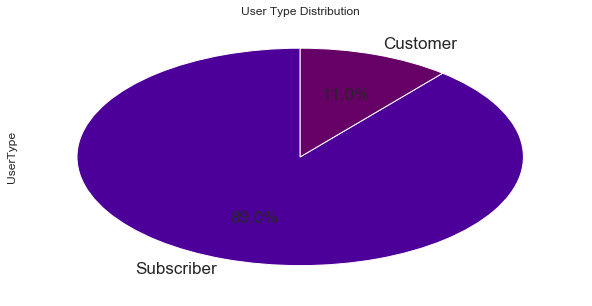

In [32]:
mpld3.enable_notebook()
plt.rcParams['figure.figsize']=[10,5]
colors = ["#4C0099", "#660066"]
dff['UserType'].value_counts().plot(kind='pie',  autopct='%1.1f%%',  startangle=90, fontsize=17,colors=colors)
plt.title("User Type Distribution")
plt.savefig('user_type_dist.png', dpi=400)

We can see that 11% are Customers and rest 89 % are Subscribers.


## Gender Distribution 

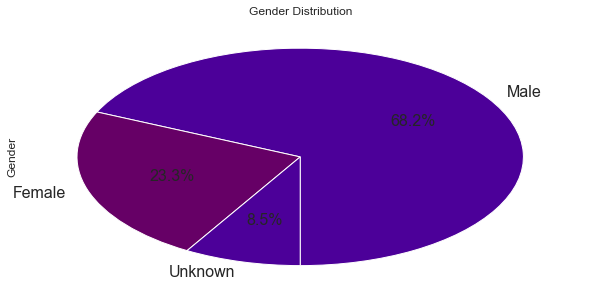

In [33]:
mpld3.enable_notebook()
plt.rcParams['figure.figsize']=[10,5]
colors=["#4C0099", "#660066"]
labels=["Male","Female","Unknown"]
dff['Gender'].value_counts().plot(kind='pie',  autopct='%1.1f%%', startangle=270, fontsize=16, colors=colors,labels=labels)
plt.title("Gender Distribution")
plt.savefig('gender_dist.png', dpi=400)

68% are Gender 1 i.e. Male 

23% are Female .

left 8% are Unknown.
Perhaps left 8% have created the profile and  not filled the value in Gender Column

## User Type and Gender

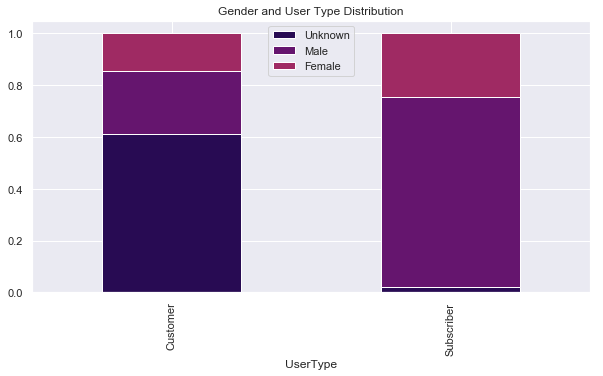

In [34]:
# mpld3.enable_notebook()
# plt.rcParams['figure.figsize']=[10,5]
table=pd.crosstab(dff['UserType'],dff['Gender'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(['Unknown','Male','Female'],loc='upper center')
# plt.legend(loc='upper right')
plt.title("Gender and User Type Distribution")
plt.savefig('gender_user_type_dist.png', dpi=400)

This shows that Gender 0 i.e. Unknown is highest in Customer category.
Which means Customer while creating the profile, keep their Gender column null or empty.

## Trip Duration Distribution 

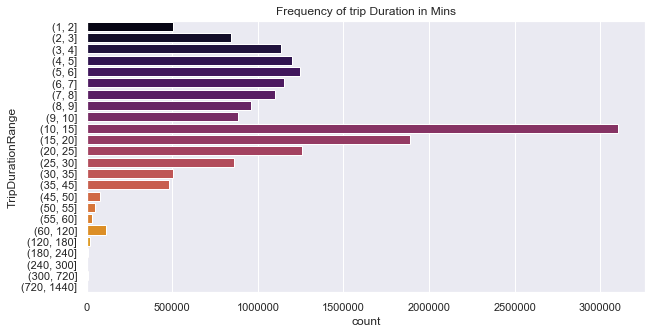

In [35]:
fig = plt.subplots( figsize=(10,5))
mpld3.disable_notebook()
sns.countplot(y='TripDurationRange',data=dff, palette="inferno")
plt.title('Frequency of trip Duration in Mins')
plt.savefig('tripduration_df_dist.png', dpi=400)

In [36]:
round(dff['TripDurationRange'].value_counts().nlargest(20) /len(dff) *100, 2)

(10, 15]      17.70
(15, 20]      10.77
(20, 25]       7.16
(5, 6]         7.10
(4, 5]         6.85
(6, 7]         6.56
(3, 4]         6.46
(7, 8]         6.26
(8, 9]         5.46
(9, 10]        5.04
(25, 30]       4.90
(2, 3]         4.81
(1, 2]         2.88
(30, 35]       2.86
(35, 45]       2.75
(60, 120]      0.64
(45, 50]       0.44
(50, 55]       0.27
(55, 60]       0.19
(120, 180]     0.12
Name: TripDurationRange, dtype: float64

Now ,the CitiBike has Two user types i.e. Customer  and Subscriber.

Customer have either Day pass or 3 day pass but

Subscriber has Annual memebership with which rider can use the bike for 45 min in a day without any extra cost.

It is clear that Both the user types will show different pattern of trip duration.Let's check it out for Customers.

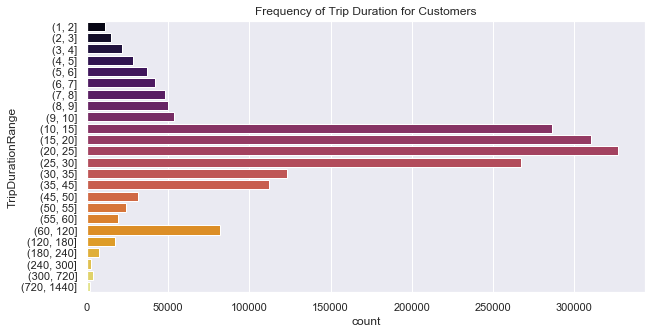

In [37]:
mpld3.disable_notebook()
fig = plt.subplots( figsize=(10,5))
customer_df=dff.loc[dff['UserType']=='Customer']
sns.countplot(y='TripDurationRange',data=customer_df,palette="inferno")
plt.title("Frequency of Trip Duration for Customers")
plt.savefig('tripduration_customer_dist.png', dpi=400)

In [38]:
round(customer_df['TripDurationRange'].value_counts().nlargest(20) /len(customer_df) *100, 2)

(20, 25]      16.92
(15, 20]      16.07
(10, 15]      14.81
(25, 30]      13.83
(30, 35]       6.38
(35, 45]       5.79
(60, 120]      4.24
(9, 10]        2.79
(8, 9]         2.58
(7, 8]         2.49
(6, 7]         2.17
(5, 6]         1.92
(45, 50]       1.62
(4, 5]         1.48
(50, 55]       1.24
(3, 4]         1.13
(55, 60]       1.00
(120, 180]     0.91
(2, 3]         0.76
(1, 2]         0.59
Name: TripDurationRange, dtype: float64

In [39]:
dff.groupby(['UserType'])['TripDurationinmin'].mean()

UserType
Customer      42.968421
Subscriber    13.195002
Name: TripDurationinmin, dtype: float64

In [40]:
dff.groupby(['Gender'])['TripDurationinmin'].mean()

Gender
0    35.069634
1    14.061166
2    16.787553
Name: TripDurationinmin, dtype: float64

In [41]:
customer_df.groupby(['Gender'])['TripDurationinmin'].mean()

Gender
0    40.221978
1    47.202406
2    47.384703
Name: TripDurationinmin, dtype: float64

From the above graphs and stats , we are able to understand few things.
1. Hardly  any Subscriber is using bike for more than 40 mins .The average trip duration is 13 mins.
 Male Subscribers have Average of 13 mins whereas Female subscribers have avg of 16 mins.
 They are tending to use frequently but not in a way that it could cost that extra cost.
 
2. Trip Duration for customer is highly peaked .Customer is using for longer period.specially for 15- 45 mins with average duration of 42 mins.
  There seems to be no differene between the average trip duration for Male and Female
 Customers.  Also, there is almost negligible percentage of customers that are using 3 day pass.Hardly anyone for 1 day even.
 
Citi organization can look into the possibility of increasing the trip duration since the mass population is from
subscribers and they tend to use it within their free  travel limit.
It will be interesting to find where does customer travel in bike.
Are there more customer in weekend or weekdays?

#### Any stolen bike ? Any incorrectly docked bikes?

It will be interesting to see the distribution of the bike trip duration .

Let's see if any one have kept the bike for more than  1 month.

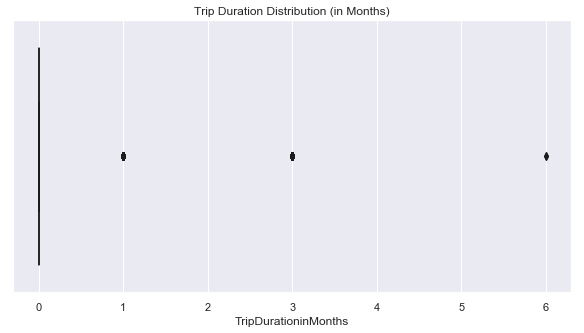

In [42]:
mpld3.disable_notebook()
sns.boxplot(dff['TripDurationinMonths'])
plt.title("Trip Duration Distribution (in Months)")
plt.savefig('trip_duration_withoutlier.png', dpi=400)

We see three outliers value for Trip duration in months.
If there is any bike used by user for more than 1 month , it's probably stolen or left or incorrectly docked .

Let's remove these three outliers value .


In [43]:
dff=dff.loc[dff['TripDurationinMonths']<1]

## Rider Age

Age of the rider plays  a very important part in depicting the user information.
The speed of the ride depends upon the age .
The start station or end staion depends upon the age since Youngesters like to live in city center but Seniors prefer suburbs.

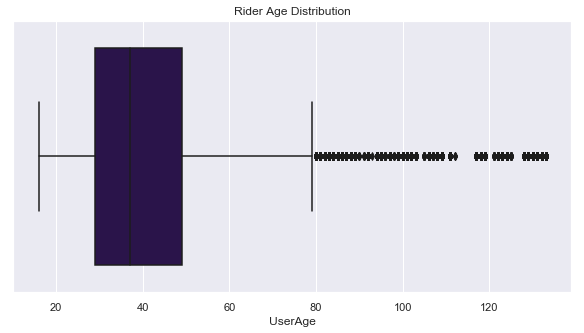

In [44]:
mpld3.disable_notebook()
sns.boxplot(dff['UserAge'])
plt.title("Rider Age Distribution")
plt.savefig('userage_outlier.png', dpi=400)

In [45]:
print(' The Minimum age of the Rider is ',dff['UserAge'].min())
print('The Maximum age of the Rider is ',dff['UserAge'].max())

 The Minimum age of the Rider is  16
The Maximum age of the Rider is  133


This seems very weird to see that someone with age of more than 100 is riding the bike.probably it's because users have given fake profile birth year to maintain their privacy .

In [46]:
print(round(dff.loc[dff['UserAge']>80]['BikeID'].count()/len(dff)  *100, 6) ,'% records have age of more than 80 years' )

0.117956 % records have age of more than 80 years


Hence it does not make sense to remove those records.

In [47]:
# dff=dff.loc[dff['UserAge']<=80]

Let's see the User Age distribution among the Riders

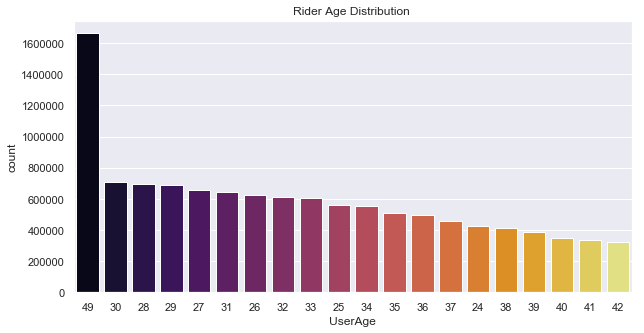

In [48]:
mpld3.enable_notebook()
sns.countplot(data=dff,x='UserAge', palette="inferno",order=dff['UserAge'].value_counts().iloc[:20].index)
plt.title("Rider Age Distribution ")
plt.savefig('userage_withoutlier.png', dpi=400)

In [49]:
round(dff['UserAge'].value_counts().nlargest(20) /len(dff) *100, 2)

49    9.48
30    4.04
28    3.97
29    3.94
27    3.75
31    3.66
26    3.54
32    3.50
33    3.46
25    3.21
34    3.17
35    2.92
36    2.82
37    2.60
24    2.44
38    2.37
39    2.22
40    2.00
41    1.90
42    1.86
Name: UserAge, dtype: float64

In [50]:
dff.groupby(['Gender'])['UserAge'].mean()

Gender
0    48.243554
1    38.475661
2    37.221274
Name: UserAge, dtype: float64

In [51]:
customer_df.groupby(['Gender'])['UserAge'].mean()

Gender
0    48.879707
1    32.616999
2    31.641265
Name: UserAge, dtype: float64

The 10% riders shown in the above graph depicts that they are  49 or 48 years old , which is quite strange that people of approx age 50 are riding bike more than college students or youngsters.It is also possible if the User has kept Birth year column , the default value of Year could be 1970.which makes it 49 years till 2018.
It is also clear from above stats that Gender 0 ( unknown) are generally of that age.

Indeed Customers are tiring to maintain privacy .

## Most used Bike 

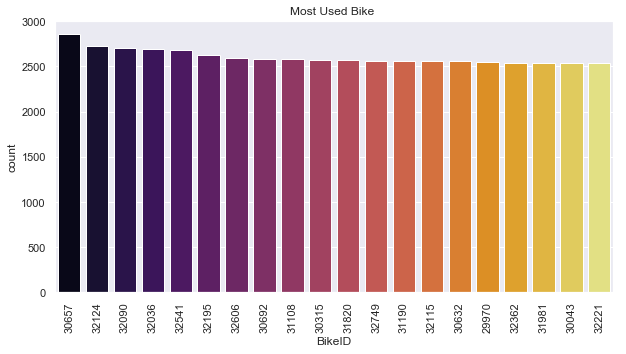

In [52]:
mpld3.disable_notebook()
fig = plt.subplots( figsize=(10,5))
ax=sns.countplot(data=dff,x='BikeID', palette="inferno",order=dff['BikeID'].value_counts().iloc[:20].index)
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.title("Most Used Bike ")
plt.savefig('bike_distribution.png', dpi=400)

In [53]:
dff.groupby(['BikeID'])['TripDurationinmin'].count().nlargest(10)

BikeID
30657    2862
32124    2728
32090    2707
32036    2691
32541    2680
32195    2627
32606    2592
30692    2584
31108    2576
30315    2570
Name: TripDurationinmin, dtype: int64

In [54]:
dff.groupby(['BikeID'])['TripDurationinmin'].count().nsmallest(10)

BikeID
17667    1
21940    1
24849    1
25870    1
28411    1
29149    1
33518    1
33548    1
33644    1
33727    1
Name: TripDurationinmin, dtype: int64

These results can be used to predict the repair/servicing date for the bike considering the usage.
Also the ones that have been used for least time, can be checked if they are broken or not.

### Rides per Quarter, Month , Week

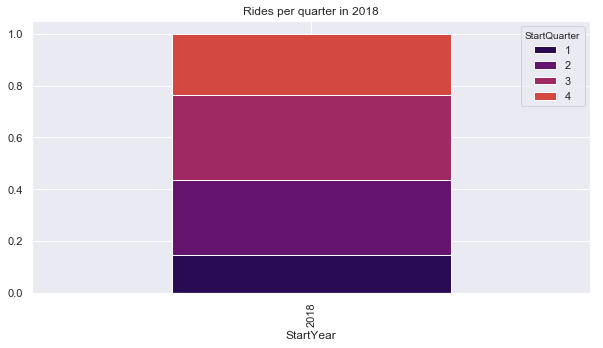

In [55]:
mpld3.enable_notebook()
table=pd.crosstab(dff['StartYear'],dff['StartQuarter'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Rides per quarter in 2018")
plt.savefig('rides_per_quarter.png', dpi=400)                                                   

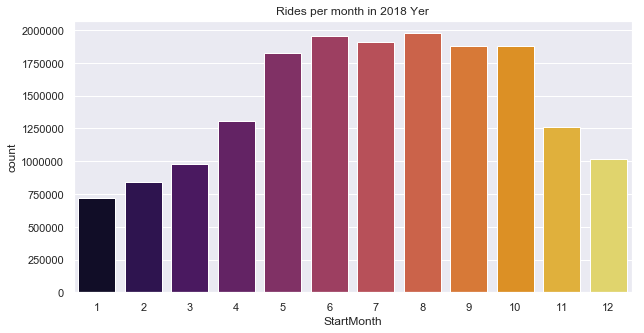

In [56]:
sns.countplot(data=dff,x='StartMonth', palette="inferno")
plt.title("Rides per month in 2018 Yer")
plt.savefig('rides_per_month.png', dpi=400)

Most usage of the bikes is from month May to October.
It would not be bad idea to coorelate it with Weather .
Customers are using it less in Fall and more in Spring .

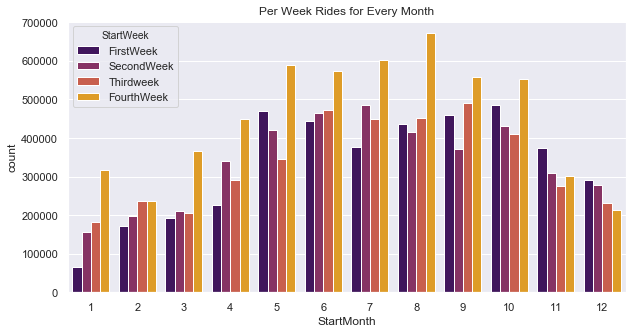

In [57]:
sns.countplot(data=dff,x='StartMonth',hue='StartWeek', palette="inferno")
plt.title("Per Week Rides for Every Month")
plt.savefig('per_week_ride_for_every_month.png', dpi=400)

For every month, we see quite same pattern of bike usage .The Highest in Fourth Weekk .Let's see if it's because of the subscribers or cusotmers

In [58]:
subscriber_df=dff.loc[dff['UserType']=='Subscriber']

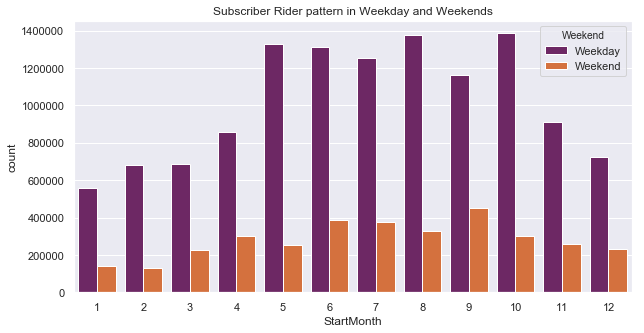

In [59]:
sns.countplot(data=subscriber_df,x='StartMonth',hue='Weekend', palette="inferno")
plt.title("Subscriber Rider pattern in Weekday and Weekends")
plt.savefig('subscriber_pattern_in_weekday_weekend.png', dpi=400)

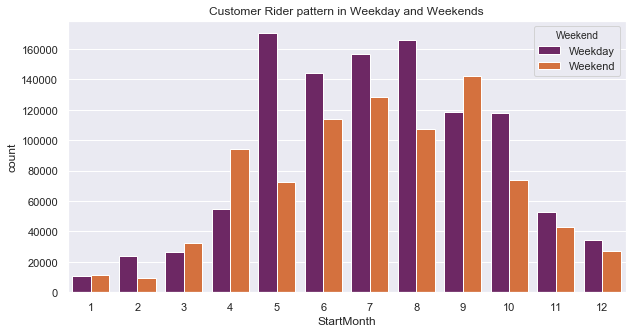

In [60]:
sns.countplot(data=customer_df,x='StartMonth',hue='Weekend', palette="inferno")
plt.title("Customer Rider pattern in Weekday and Weekends")
plt.savefig('Customer_pattern_in_weekday_weekend.png', dpi=400)

Subscribers are showing same pattern almost every month .they are using Bike for weekdays the most.
But the Customers tend to use the bike often for weekdays as well as Weekends.
So which means , Customers are the one that have dependency on the weather very much.In Summer season Customers are seen riding the bike  in weekdays as well as Weekends .

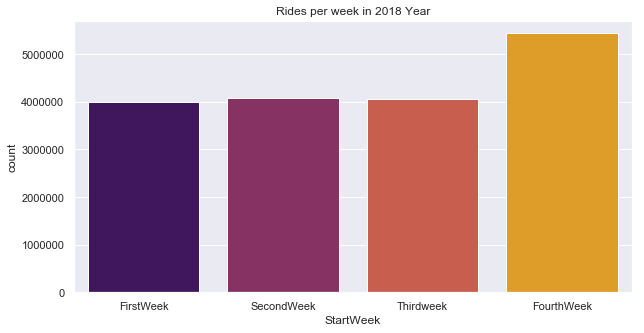

In [61]:
sns.countplot(data=dff,x='StartWeek', palette="inferno")
plt.title("Rides per week in 2018 Year")
plt.savefig('rides_per_week.png', dpi=400)

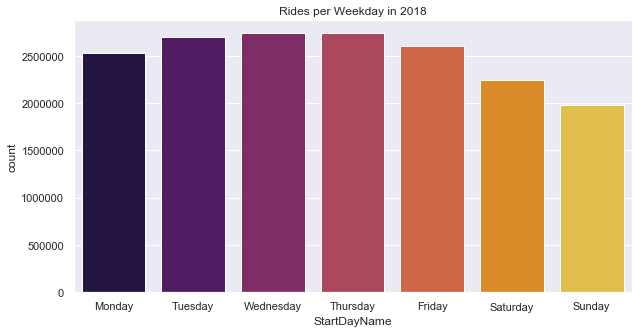

In [62]:
sns.countplot(data=dff,x='StartDayName', palette="inferno")
plt.title("Rides per Weekday in 2018")
plt.savefig('rides_per_weekday.png', dpi=400)

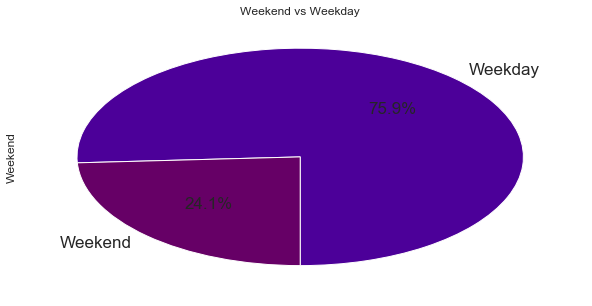

In [63]:
colors = ["#4C0099", "#660066"]
dff['Weekend'].value_counts().plot(kind='pie',  autopct='%1.1f%%', startangle=270, fontsize=17, colors=colors)
plt.title("Weekend vs Weekday")
plt.savefig('weekend_vs_weekday.png', dpi=400)

#### Rides per hour, per Day

This information can depict the traffic scenarios, population density of the areas.


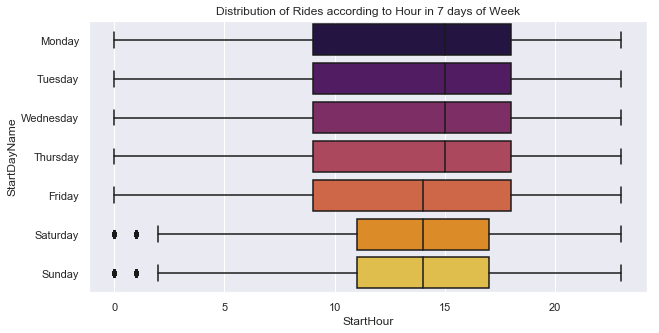

In [64]:
mpld3.disable_notebook()
sns.boxplot(x='StartHour',y='StartDayName',data=dff, palette="inferno")
plt.title("Distribution of Rides according to Hour in 7 days of Week")
plt.savefig('starthour_per_day_of_week.png', dpi=400)

In [65]:
def color(val):
    if (val  >=1.2 ):
        color='red'
    elif (val >=0.5) & (val <1.2):
        color='orange'
    else :
        color='green'
    return 'color: %s' % color

In [66]:
g=pd.crosstab(dff['StartHour'], dff['StartDayName']).apply(lambda r: round(r/len(dff) *100 ,2), axis=1)
color=g.style.applymap(color)
color

StartDayName,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
StartHour,,,,,,,
0,0.13,0.09,0.18,0.18,0.11,0.09,0.1
1,0.07,0.05,0.12,0.11,0.05,0.04,0.05
2,0.04,0.03,0.07,0.07,0.03,0.02,0.03
3,0.02,0.02,0.04,0.05,0.02,0.01,0.02
4,0.03,0.02,0.03,0.03,0.03,0.03,0.03
5,0.1,0.11,0.03,0.02,0.12,0.13,0.13
6,0.36,0.37,0.08,0.06,0.42,0.46,0.43
7,0.77,0.79,0.19,0.13,0.88,0.94,0.9
8,1.36,1.33,0.36,0.27,1.57,1.6,1.56


In [67]:
g=pd.crosstab(dff['StartWeek'], dff['StartHour']).apply(lambda r: round(r/len(dff) *100 ,2), axis=1)
def color(val):
    if (val  >=2 ):
        color='red'
    elif (val >=1.4) & (val <2):
        color='orange'
    else :
        color='green'
    return 'color: %s' % color

In [68]:
color=g.style.applymap(color)
color

StartHour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
StartWeek,,,,,,,,,,,,,,,,,,,,,,,,
FirstWeek,0.2,0.11,0.07,0.04,0.04,0.15,0.5,1.06,1.8,1.41,1,1.07,1.24,1.3,1.32,1.39,1.63,2.23,2.12,1.47,1.01,0.72,0.53,0.35
FourthWeek,0.27,0.15,0.09,0.06,0.06,0.19,0.65,1.36,2.41,1.94,1.4,1.48,1.74,1.81,1.85,1.94,2.24,2.98,2.83,1.99,1.36,0.96,0.71,0.47
SecondWeek,0.2,0.11,0.06,0.04,0.04,0.15,0.53,1.13,1.97,1.51,1.02,1.07,1.23,1.27,1.31,1.39,1.62,2.27,2.2,1.5,1.02,0.71,0.53,0.36
Thirdweek,0.2,0.11,0.07,0.04,0.04,0.15,0.51,1.07,1.88,1.47,1.05,1.09,1.25,1.31,1.33,1.4,1.65,2.25,2.13,1.48,1,0.71,0.52,0.34


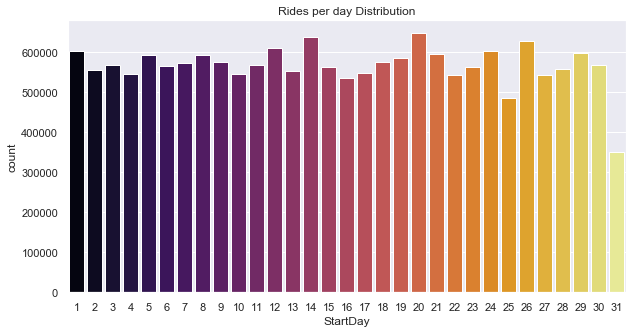

In [69]:
mpld3.enable_notebook()
sns.countplot(data=dff,x='StartDay', palette="inferno")
plt.title("Rides per day Distribution")
plt.savefig('rides_per_day_dist.png', dpi=400)

The graph shows that the distribution is following a wave .After every 4 days, the rides are little bit higher.It seems that  increase is because the customer rides on weekends are adding up.

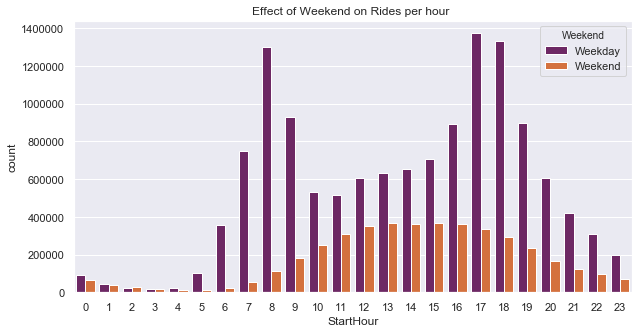

In [70]:
sns.countplot(data=dff,x='StartHour',hue='Weekend', palette="inferno")
plt.title("Effect of Weekend on Rides per hour ")
plt.savefig('rides_per_hour_weekend_weekday.png', dpi=400)

So, we found that Users are riding the bike generally in office hours in weekdays  ,but for weekends, the patterns is seen mostly between 11:00 to  18:00.

## Stations

It will be interesting to find what are the most popular Stations , most popular route also.

### Most Popular Start Station

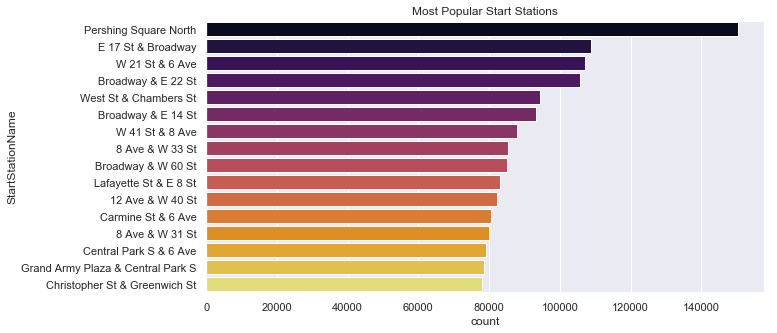

In [71]:
mpld3.disable_notebook()
fig = plt.subplots( figsize=(10,5))
sns.countplot(data=dff,y='StartStationName', palette="inferno",order=dff['StartStationName'].value_counts().iloc[:16].index)
plt.title("Most Popular Start Stations")
plt.savefig('most_popular_start_stations.png', dpi=400)

### Most Popular End Station

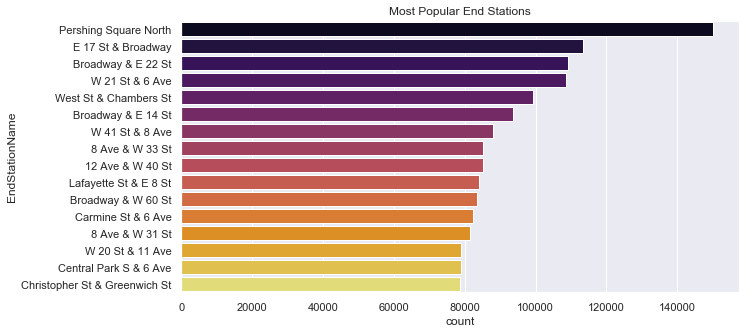

In [72]:
sns.countplot(data=dff,y='EndStationName', palette="inferno",order=dff['EndStationName'].value_counts().iloc[:16].index)
plt.title("Most Popular End Stations")
plt.savefig('most_popular_end_stations.png', dpi=400)

The graphs are depeicting the inflow and outflow of the stations .We found Top 16 popular Start Stations and End Stations and most of them are duplicates are also.
It seems there are many circular routes that Rides are taking .We can see it detail in later steps of this notebook.

### Most Popular Route

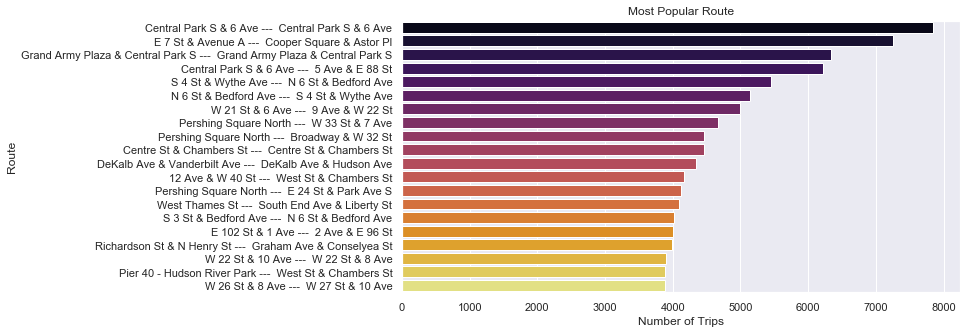

In [73]:
Trips = dff.groupby(['StartStationName','EndStationName']).size().reset_index(name = 'Number of Trips')
Trips = Trips.sort_values('Number of Trips', ascending = False)
Trips['Route'] = Trips["StartStationName"] + " ---  " + Trips["EndStationName"]
Trips.drop(['StartStationName','EndStationName'], axis=1, inplace=True)
Trips=Trips[:20]
Trips=Trips.reset_index()
# Trips.head()
sns.barplot('Number of Trips','Route', data = Trips,palette="inferno")
plt.title("Most Popular Route")
plt.savefig('most_popular_route.png', dpi=400)

It is clearly evident that the most popular routes are also including Round Routes i.e. Start and end stations are same.

## New York Map

In [74]:
dfff=dff[:5000]
from folium.plugins import HeatMapWithTime
newyork= folium.Map(location=[40.7128, -73.935242])#, zoom_start=12)
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(dfff['StartStationLatitude'], dfff['StartStationLongitude'], dfff['StartHour']):
    hour_list[hour].append([lat,log]) 
index = [str(i)+' Hours' for i in range(24)]
HeatMapWithTime(hour_list, index).add_to(newyork)

newyork

In [75]:
dfff=dff[:5000]
from folium.plugins import HeatMapWithTime
newyork= folium.Map(location=[40.7128, -73.935242])#, zoom_start=12)
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(dfff['StartStationLatitude'], dfff['StartStationLongitude'], dfff['StopHour']):
    hour_list[hour].append([lat,log]) 
index = [str(i)+' Hours' for i in range(24)]
HeatMapWithTime(hour_list, index).add_to(newyork)

newyork

In [76]:
# from folium import plugins
# newyork= folium.Map(location=[40.7128, -73.935242], zoom_start=12)
# p = plugins.MarkerCluster().add_to(newyork)
# for lat, lng, label in zip(dfff['StartStationLatitude'], dfff['StartStationLongitude'], dfff['Gender'].astype(str)):
#     if label!='0':
#         folium.Marker(
#             location=[lat, lng],
#             icon=None,
#             popup=label,
#         ).add_to(p)

# # Display map
# newyork

# 5. Feature Engineering

## One Min Routes

Many of the public bikes are broken , or they have irregular chains, or flat tires..
Considering that Rider took the bike and rode it for few secs and realised that its not working properly.
Rider opts to put it back to the same station where he started and he ends the route there and take a new bike.

In [77]:
dff_1_min_route=dff.loc[(dff['StartStationID'] == dff['EndStationID']) & (dff['TripDurationinmin'] == 1)]
print(round(dff_1_min_route.shape[0]/len(dff)   * 100,2),'% rides have broken bikes and trip duration of only 1 minute')

0.14 % rides have broken bikes and trip duration of only 1 minute


In [78]:
dff_1_min_route.head(2)

,BikeID,UserType,UserAge,Gender,StartStationID,StartStationName,StartStationLatitude,StartStationLongitude,EndStationID,EndStationName,EndStationLatitude,EndStationLongitude,StartDate,StopDate,StartYear,StartQuarter,StartMonth,StartWeek,StartDay,StartDayName,StartHour,StopHour,TripDurationinMonths,TripDurationinmin,TripDurationRange,Weekend
1527,15444,Subscriber,48,2,79.0,Franklin St & W Broadway,40.719116,-74.006667,79.0,Franklin St & W Broadway,40.719116,-74.006667,2018-01-11 11:26:01.666,2018-01-11 11:27:21.717,2018,1,1,SecondWeek,11,Thursday,11,11,0,1,NaN,Weekday
1649,15420,Subscriber,52,2,79.0,Franklin St & W Broadway,40.719116,-74.006667,79.0,Franklin St & W Broadway,40.719116,-74.006667,2018-01-14 18:47:56.465,2018-01-14 18:49:16.097,2018,1,1,SecondWeek,14,Sunday,18,18,0,1,NaN,Weekend


In [79]:
dff_1_min_route['StartStationName'].value_counts().nlargest(5)

Grand Army Plaza & Central Park S    201
Central Park S & 6 Ave               194
West St & Chambers St                177
12 Ave & W 40 St                     175
Broadway & W 60 St                   150
Name: StartStationName, dtype: int64

In [80]:
dff_1_min_route['BikeID'].value_counts().nlargest(5)

22368    46
30099    13
26351    12
33290    11
30360    11
Name: BikeID, dtype: int64

These stations do have bikes that are broken because they are on the top of Most popular stations also.
This means because of high demand , the bikes have been used alot at these stations.

## Round Route

In the above sections of this notebook, we found that there are circular routes that Riders are taking .
let's find out more about it .

In [72]:
dff_circular_route=dff.loc[(dff['StartStationID'] ==  dff['EndStationID'])]
print(round(dff_circular_route.shape[0]/len(dff)   * 100,2),'% rides have circular routes')

1.98 % rides have circular routes


In [73]:
dff_circular_route['UserType'].value_counts()

Subscriber    231041
Customer      116059
Name: UserType, dtype: int64

In [74]:
dff_circular_route.head(2)

,BikeID,UserType,UserAge,Gender,StartStationID,StartStationName,StartStationLatitude,StartStationLongitude,EndStationID,EndStationName,EndStationLatitude,EndStationLongitude,StartDate,StopDate,StartYear,StartQuarter,StartMonth,StartWeek,StartDay,StartDayName,StartHour,StopHour,TripDurationinMonths,TripDurationinmin,TripDurationRange,Weekend
72,31256,Subscriber,58,1,72.0,W 52 St & 11 Ave,40.767272,-73.993929,72.0,W 52 St & 11 Ave,40.767272,-73.993929,2018-01-03 13:25:36.171,2018-01-03 13:34:16.839,2018,1,1,FirstWeek,3,Wednesday,13,13,0,9,"(8, 9]",Weekday
78,30667,Subscriber,61,1,72.0,W 52 St & 11 Ave,40.767272,-73.993929,72.0,W 52 St & 11 Ave,40.767272,-73.993929,2018-01-03 15:59:20.648,2018-01-03 16:39:25.753,2018,1,1,FirstWeek,3,Wednesday,15,16,0,40,"(35, 45]",Weekday


In [104]:
a=dff_circular_route.groupby(['StartStationName'])['StartHour'].agg(['median', 'count']).reset_index()\
.sort_values(['count'], ascending=False).head(10)
b=dff_circular_route.groupby(['StartStationName'])['TripDurationinmin'].agg(['mean', 'count']).reset_index()\
.sort_values(['count'], ascending=False).head(10)
vertical_stack = pd.concat([a, b.drop(['StartStationName'],axis=1)], axis=1)
merged=vertical_stack.drop('count',axis=1)
merged.columns=['Station','Avg_start_Time','Avg_Route_Time']
merged

,Station,Avg_start_Time,Avg_Route_Time
225,Central Park S & 6 Ave,14.0,45.906393
457,Grand Army Plaza & Central Park S,13.0,65.427333
233,Centre St & Chambers St,15.0,31.418907
803,West Drive & Prospect Park West,15.0,39.280770
816,Yankee Ferry Terminal,14.0,39.069884
230,Central Park West & W 72 St,15.0,36.211932
657,Soissons Landing,14.0,48.986282
108,5 Ave & E 73 St,15.0,30.988522
198,Broadway & W 60 St,15.0,41.639060
18,12 Ave & W 40 St,14.0,33.931061


We found that Most rides that are taking these circular routes are between 13:00 to 15:30 .
It  seems  users are maybe using bike to go for lunch during these times.

## TRIP DISTANCE
The Coordinates of the start stations and end stations can be definitely used to find out the distance of the trip.

In [96]:
from geopy.distance import vincenty

In [112]:
# def distancer(row):
#     coords_1 = (row['StartStationLatitude'], row['StartStationLongitude'])
#     coords_2 = (row['EndStationLatitude'], row['EndStationLongitude'])
#     return vincenty(coords_1, coords_2).miles

# dff['Miles'] = dff.apply(distancer, axis=1)

In [113]:
# dist = []
# for i in range(len(dff)):
#     dist.append(geopy.distance.vincenty(dff.iloc[i]['Start Station '],dfff.iloc[i]['End Coordinates']).miles)
#     print(dist[i])
#     if (i%1000000==0):
#         print(i)

In [51]:
# start=pd.DataFrame(dff['StartStationName'].value_counts().reset_index())
# start.columns=['StationName','StartCount']
# end=pd.DataFrame(dff['EndStationName'].value_counts().reset_index())
# end.columns=['StationName','EndCount']
# merged=pd.merge(start, end , on='StationName')
# merged.head()

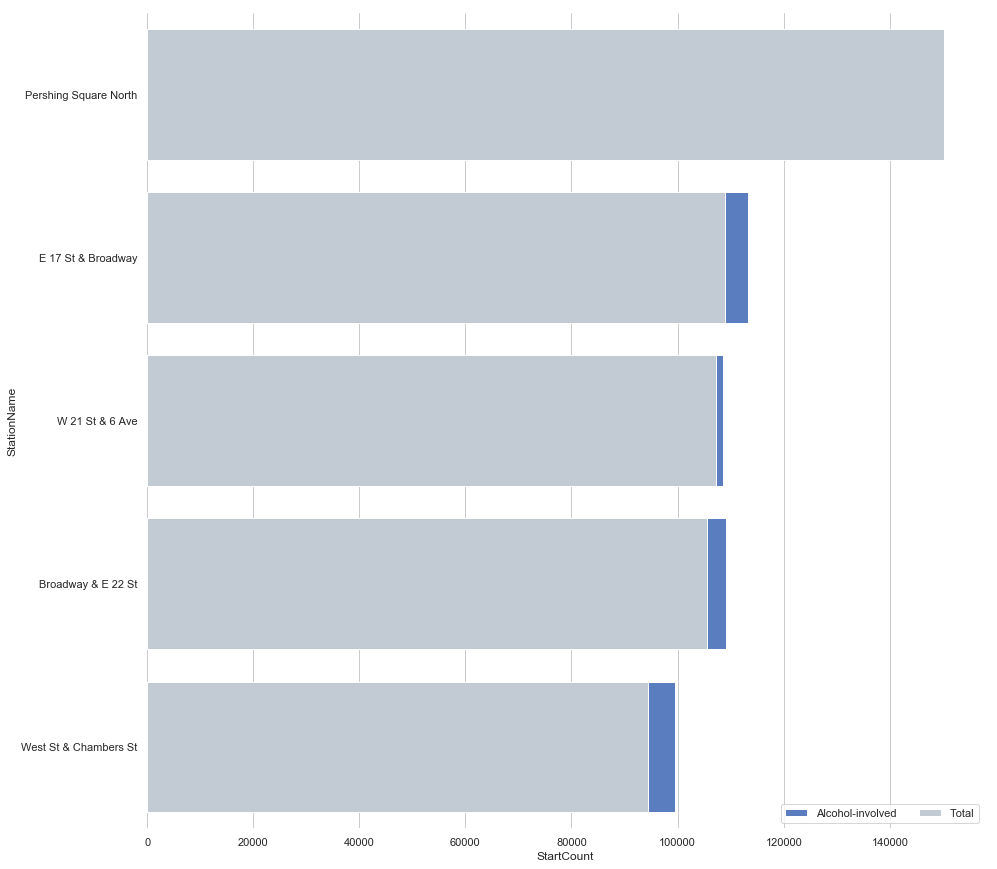

In [68]:
# data = merged.head(5)
# sns.set(style="whitegrid")

# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(15, 15))
# sns.set_color_codes("muted")
# sns.barplot(y="StationName", x="EndCount", data=data,label="Alcohol-involved",color="b")
# sns.set_color_codes("pastel")
# sns.barplot(y="StationName", x="StartCount", data=data,label="Total",color="b",saturation=0.2,)

# ax.legend(ncol=2, loc="lower right", frameon=True)
# sns.despine(left=True, bottom=True)


## Speed
Once we have the Trip Distance , we can calculate the speed with which riders are using bikes..

# 6. Train and test Split
 

In [ ]:
# le = preprocessing.LabelEncoder()
# for column_name in x.columns:
#     if x[column_name].dtype == object:
#         x[column_name] = le.fit_transform(x[column_name])
#     else:
#         pass


In [ ]:
# from sklearn.model_selection import train_test_split
# xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

# 7. Model Training

# 8. Conclusions 

# 9. Future Improvements

1. More detailed exploration of the data can be done like, why the rides in Fourth week are highest in number,traffic in office hours, patterns of subscribers and customers in summer season.

2. Distance and Speed of the ride can be calculated by finding distance between Start stations coordinates and End stations coordinates.This helps in predicting the trip duration given both the stations.

3. Weather Data  like Temp and Windspeed can be collaborated to find more insights .

4. Learning more about the Route can help in identifying the best Bike lane given the destination.

5. Using the dataset, Variouss Predictions can be done like Bike Maintainence depends upon the usage , Demand of Bike , station inflow and outflow , customer segmention for age and preference for electric bike .

6. Model can also be trained with other Algorithms and the accuracy can be compared.Model with highest accuracy can be selected .

7. Better Visualization Libraries like geopandas, Plotly can be opted .

8. Implementation of Bigquery with pyspark to fetch the data would be better too.
